**This Dataset consists of salaries for Data Scientists, Machine Learning Engineers, Data Analysts, and Data Engineers in various cities across India (2022).**

**-Salary Dataset.csvprofessionals-salary-dataset-eda**

**-salary_data_cleaned new.csv**

## <b><div style='padding:15px;background-color:#fb3640;color:white;border-radius:40px;font-size:60%;text-align: center'>   Import Libraries</div></b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio    
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

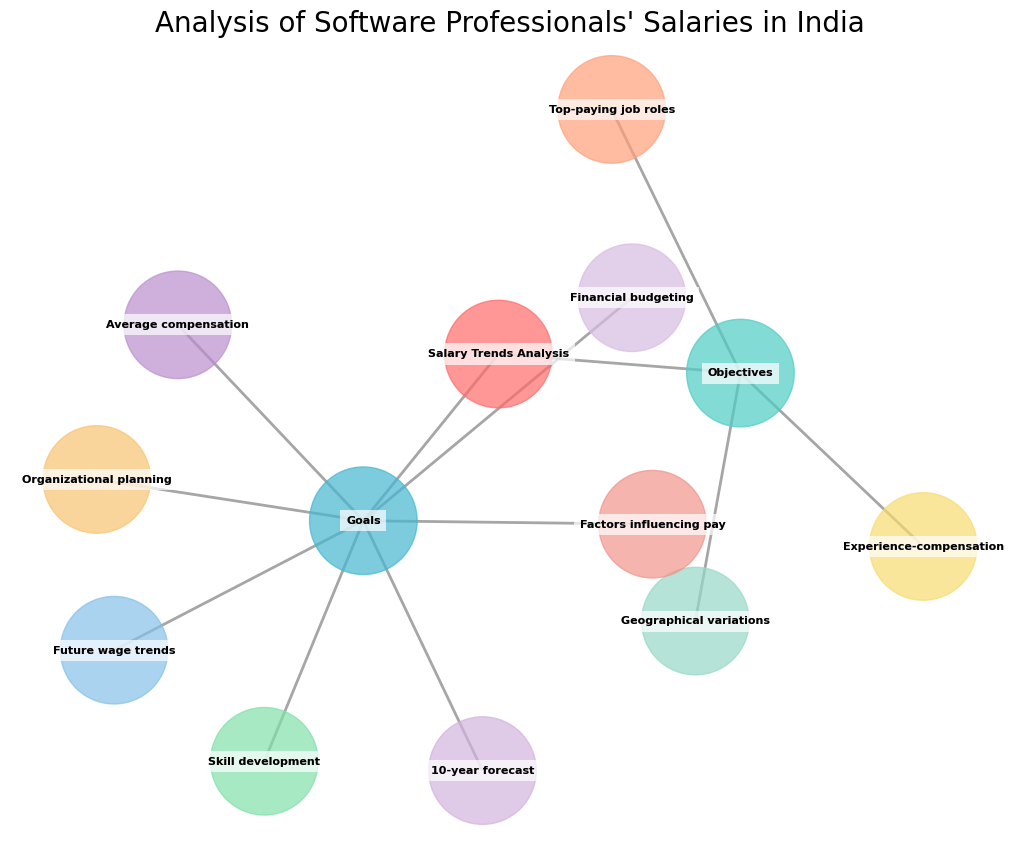

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes
nodes = [
    "Salary Trends Analysis", "Objectives", "Goals",
    "Top-paying job roles", "Geographical variations", "Experience-compensation",
    "Average compensation", "Factors influencing pay", "Future wage trends",
    "Skill development", "Organizational planning", "Financial budgeting",
    "10-year forecast"
]
G.add_nodes_from(nodes)

# Add edges
edges = [
    ("Salary Trends Analysis", "Objectives"),
    ("Salary Trends Analysis", "Goals"),
    ("Objectives", "Top-paying job roles"),
    ("Objectives", "Geographical variations"),
    ("Objectives", "Experience-compensation"),
    ("Goals", "Average compensation"),
    ("Goals", "Factors influencing pay"),
    ("Goals", "Future wage trends"),
    ("Goals", "Skill development"),
    ("Goals", "Organizational planning"),
    ("Goals", "Financial budgeting"),
    ("Goals", "10-year forecast")
]
G.add_edges_from(edges)

# Set up the plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Define color scheme
node_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', 
               '#BB8FCE', '#F1948A', '#85C1E9', '#82E0AA', '#F8C471', '#D7BDE2', '#D2B4DE']

# Draw the graph
nx.draw(G, pos, with_labels=False, node_color=node_colors, 
        node_size=6000, font_size=10, font_weight='bold', 
        edge_color='gray', width=2, alpha=0.7)

# Add labels to nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold', font_color='black')

# Add a white background to labels for better visibility
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=8, fontweight='bold', 
             ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title("Analysis of Software Professionals' Salaries in India", fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()

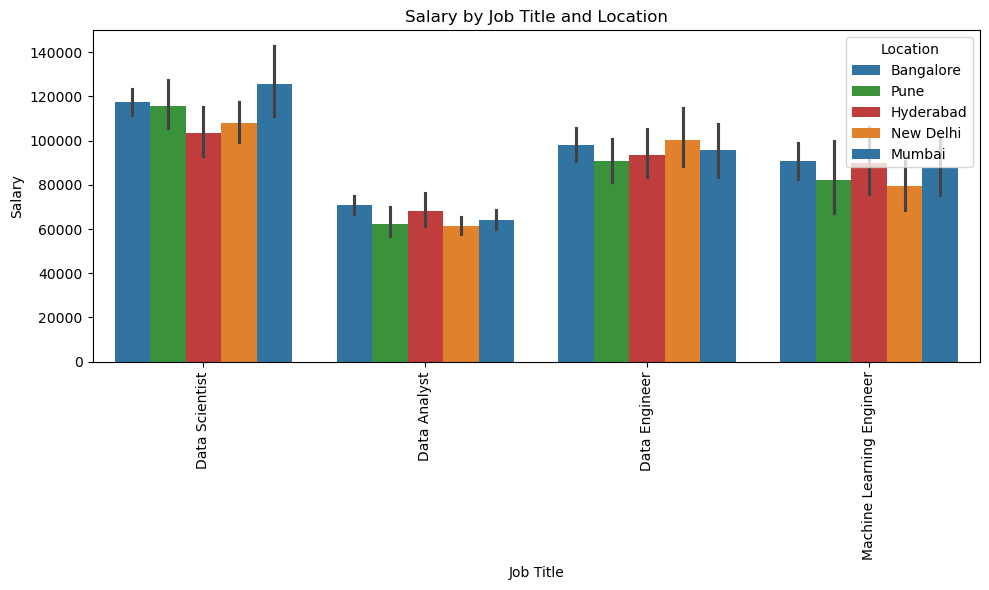

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('salary_data_cleaned new.csv')

# Ensure 'Salary' is numeric
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Drop rows with NaN values in 'Salary', 'Job Title', or 'Location'
df.dropna(subset=['Salary', 'Job Title', 'Location'], inplace=True)

# Define a custom color palette
palette = ["#1f77b4", "#2ca02c", "#d62728", "#ff7f0e"]

# Create a bar chart of Salary by Job Title and Location
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Job Title', y='Salary', hue='Location', palette=palette)
plt.xticks(rotation=90)
plt.title('Salary by Job Title and Location')
plt.xlabel('Job Title')
plt.ylabel('Salary')

# Move the legend to the top right corner
plt.legend(title='Location', loc='upper right')

plt.tight_layout()
plt.show()

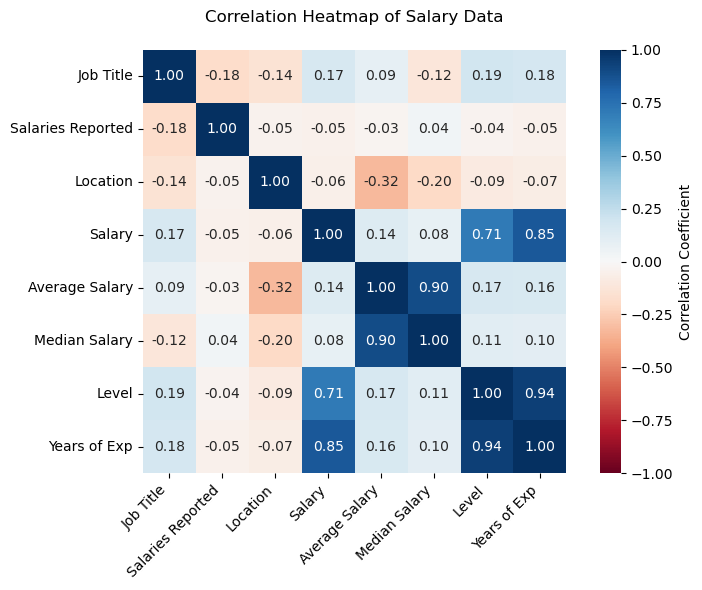


Correlation Matrix:
                   Job Title  Salaries Reported  Location  Salary  \
Job Title               1.00              -0.18     -0.14    0.17   
Salaries Reported      -0.18               1.00     -0.05   -0.05   
Location               -0.14              -0.05      1.00   -0.06   
Salary                  0.17              -0.05     -0.06    1.00   
Average Salary          0.09              -0.03     -0.32    0.14   
Median Salary          -0.12               0.04     -0.20    0.08   
Level                   0.19              -0.04     -0.09    0.71   
Years of Exp            0.18              -0.05     -0.07    0.85   

                   Average Salary  Median Salary  Level  Years of Exp  
Job Title                    0.09          -0.12   0.19          0.18  
Salaries Reported           -0.03           0.04  -0.04         -0.05  
Location                    -0.32          -0.20  -0.09         -0.07  
Salary                       0.14           0.08   0.71          0.85

In [5]:
df = pd.read_csv('salary_data_cleaned new.csv')

# Select the columns for correlation
columns_of_interest = [
    'Job Title',
    'Salaries Reported',
    'Location',
    'Salary',
    'Average Salary',
    'Median Salary',
    'Level',
    'Years of Exp'
]

# Create correlation matrix
# For categorical variables, we'll use label encoding
correlation_df = df[columns_of_interest].copy()

# Clean the 'Years of Exp' column
def convert_years_of_exp(exp):
    if '-' in exp:  # If it's a range
        start, end = map(int, exp.split('-'))
        return (start + end) / 2  # Return the average of the range
    return float(exp)  # Convert to float if it's a single number

correlation_df['Years of Exp'] = correlation_df['Years of Exp'].apply(convert_years_of_exp)

# Ensure salary columns are numeric
salary_columns = ['Salary', 'Average Salary', 'Median Salary']
for col in salary_columns:
    correlation_df[col] = pd.to_numeric(correlation_df[col], errors='coerce')

# Drop rows with NaN values after conversion
correlation_df.dropna(inplace=True)

# Convert categorical variables to numeric using label encoding
categorical_columns = ['Job Title', 'Location', 'Level']
for col in categorical_columns:
    correlation_df[col] = pd.Categorical(correlation_df[col]).codes

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation values
    cmap='RdBu',  # Red-Blue colormap
    center=0,     # Center the colormap at 0
    vmin=-1,      # Minimum correlation value
    vmax=1,       # Maximum correlation value
    fmt='.2f',    # Show 2 decimal places
    square=True,  # Make cells square
    cbar_kws={'label': 'Correlation Coefficient'}
)

# Customize the plot
plt.title('Correlation Heatmap of Salary Data', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('salary_correlation_heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix.round(2))

In [11]:
# Checking non-numeric columns of df
df.describe(include=['O'])

,Company Name,Job Title,Location,Level,Years of Exp
count,4339,4339,4339,4339,4339
unique,2486,4,5,4,4
top,Accenture,Data Scientist,Bangalore,Junior,1-6
freq,94,1955,1584,2848,2848


In [12]:
df[['Location', 'Salary']].groupby(['Location'], as_index=False).mean().sort_values(by='Salary', ascending=False)

,Location,Salary
0,Bangalore,105632.742424
4,Pune,94613.615479
2,Mumbai,93808.701783
1,Hyderabad,88396.215247
3,New Delhi,87491.549618


Salary Statistics:
count      4339.000000
mean      96488.073058
std       79730.894077
min       30000.000000
25%       49266.000000
50%       72000.000000
75%      120000.000000
max      956894.000000
Name: Salary, dtype: float64


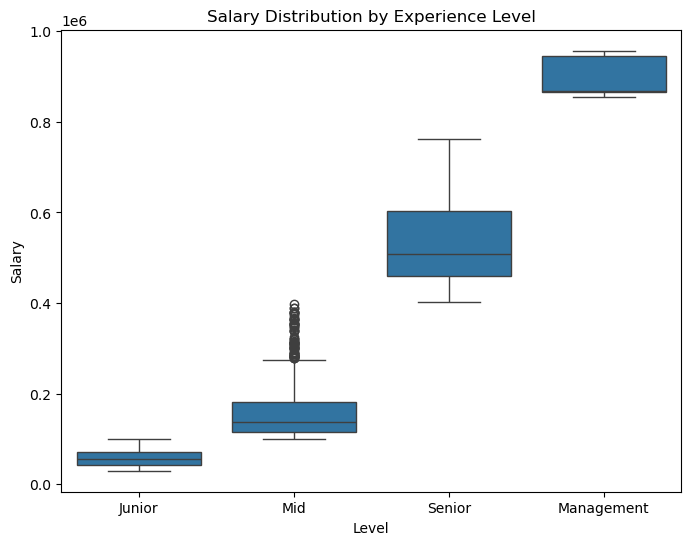

R-squared score: 0.7387
Coefficient: 20281.07
Intercept: 30513.55


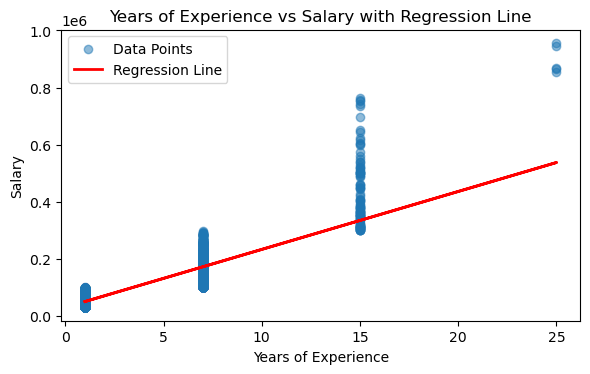

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('salary_data_cleaned new.csv')

# Convert 'Years of Exp' to numeric (using lower bound of range)
df['Years of Exp'] = df['Years of Exp'].apply(lambda x: float(str(x).split('-')[0]))

# Basic statistics
print("Salary Statistics:")
print(df['Salary'].describe())

# Salary distribution by experience level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Level', y='Salary', data=df)
plt.title('Salary Distribution by Experience Level')
plt.show()

# Define features (X) and target (y)
X = df[['Years of Exp']]
y = df['Salary']

# Handle missing data (if applicable)
X = X.dropna()
y = y.loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print regression results
print(f"R-squared score: {model.score(X_test, y_test):.4f}")
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Visualize regression and prediction trend
plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.5, label='Data Points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Years of Experience vs Salary with Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
df = pd.read_csv(r'salary_data_cleaned new.csv')
print(df)

      Sr. No.               Company Name                  Job Title  \
0           1                   Mu Sigma             Data Scientist   
1           2                        IBM             Data Scientist   
2           3  Tata Consultancy Services             Data Scientist   
3           4           Impact Analytics             Data Scientist   
4           5                  Accenture             Data Scientist   
...       ...                        ...                        ...   
4334     4335                   TaiyÅAI  Machine Learning Engineer   
4335     4336    Decimal Point Analytics  Machine Learning Engineer   
4336     4337                     MyWays  Machine Learning Engineer   
4337     4338  Market Pulse Technologies  Machine Learning Engineer   
4338     4339                        IBM  Machine Learning Engineer   

      Salaries Reported   Location  Salary  Average Salary  \
0                   105  Bangalore   64857           96489   
1                    95

In [7]:
display(df)

,Sr. No.,Company Name,Job Title,Salaries Reported,Location,Salary,Average Salary,Weighted Average Salary,Median Salary,Level,Years of Exp
0,1,Mu Sigma,Data Scientist,105,Bangalore,64857,96489,89337,72000,Junior,1-6
1,2,IBM,Data Scientist,95,Bangalore,119190,96495,89339,72000,Mid,7-14
2,3,Tata Consultancy Services,Data Scientist,66,Bangalore,83687,96490,89339,72000,Junior,1-6
3,4,Impact Analytics,Data Scientist,40,Bangalore,66957,96493,89339,72000,Junior,1-6
4,5,Accenture,Data Scientist,32,Bangalore,94411,96500,89339,72000,Junior,1-6
...,...,...,...,...,...,...,...,...,...,...,...
4334,4335,TaiyÅAI,Machine Learning Engineer,1,Mumbai,76216,89531,89537,76216,Junior,1-6
4335,4336,Decimal Point Analytics,Machine Learning Engineer,1,Mumbai,75128,92860,92865,84556,Junior,1-6
4336,4337,MyWays,Machine Learning Engineer,1,Mumbai,41095,98770,98774,93984,Junior,1-6
4337,4338,Market Pulse Technologies,Machine Learning Engineer,1,Mumbai,161232,127608,127604,127608,Mid,7-14


In [8]:
# Location - Count
location = df.Location.value_counts()
location.head()

Location
Bangalore    1584
Pune          814
Hyderabad     669
New Delhi     655
Mumbai        617
Name: count, dtype: int64

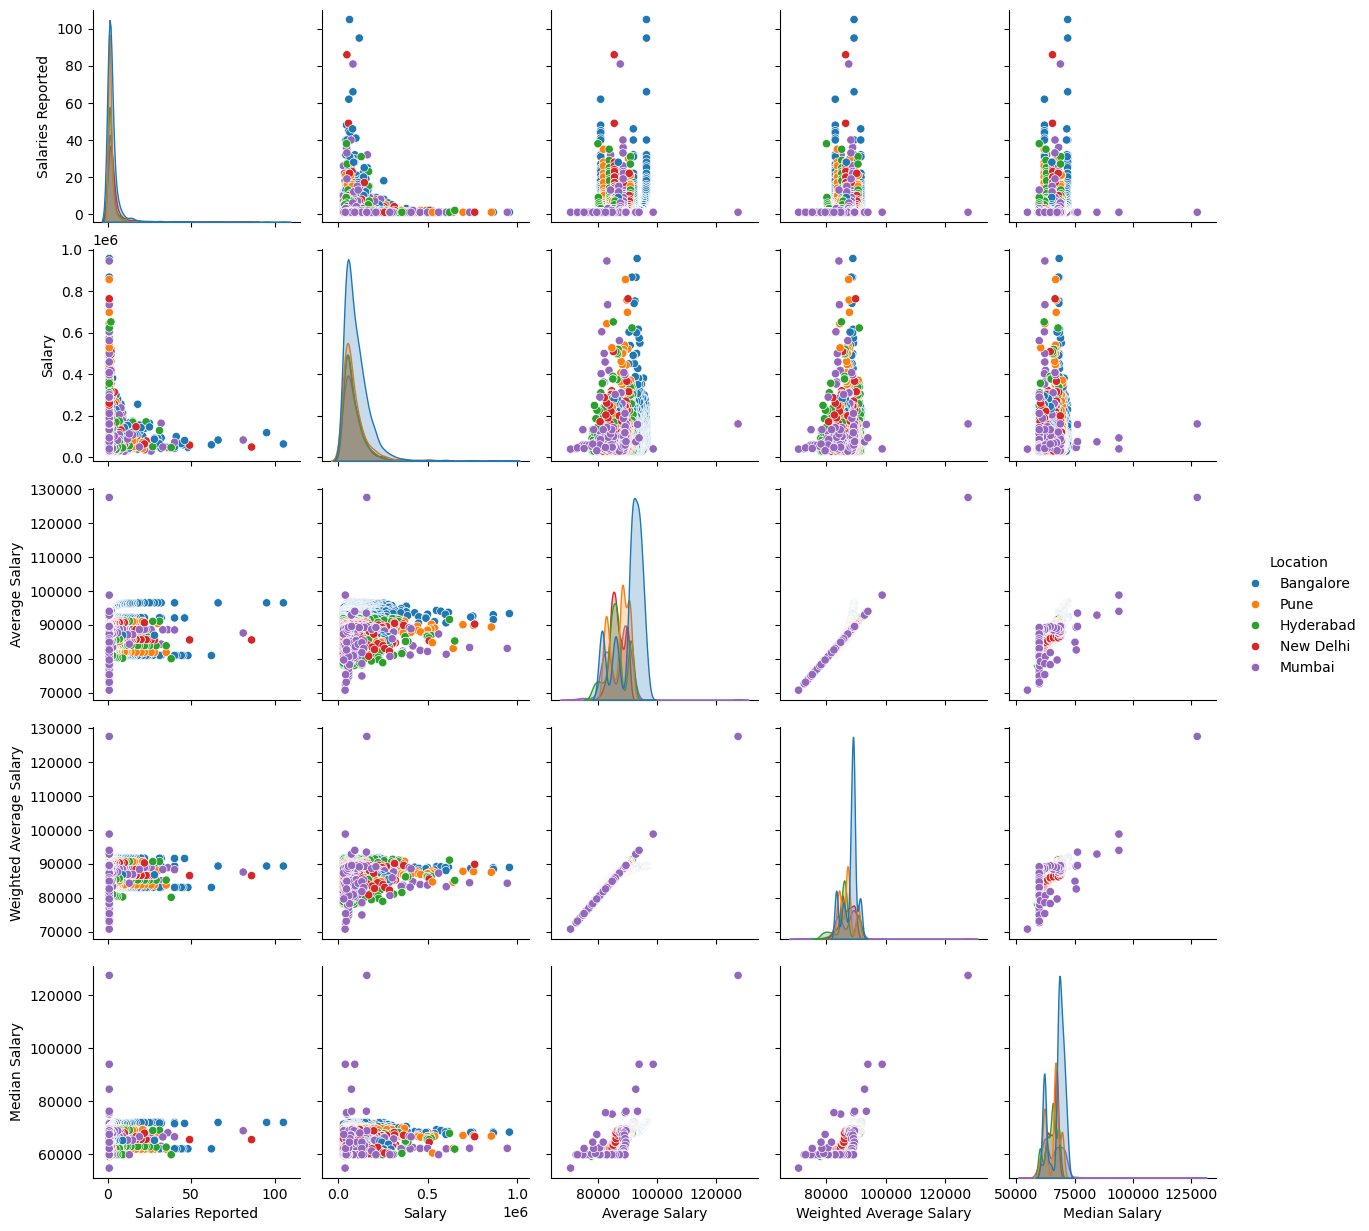

In [9]:
# Pairplot 'Location'
if 'Sr. No.' in df.columns:
    df.drop(['Sr. No.'], axis=1, inplace=True)
sns.pairplot(df,hue='Location')

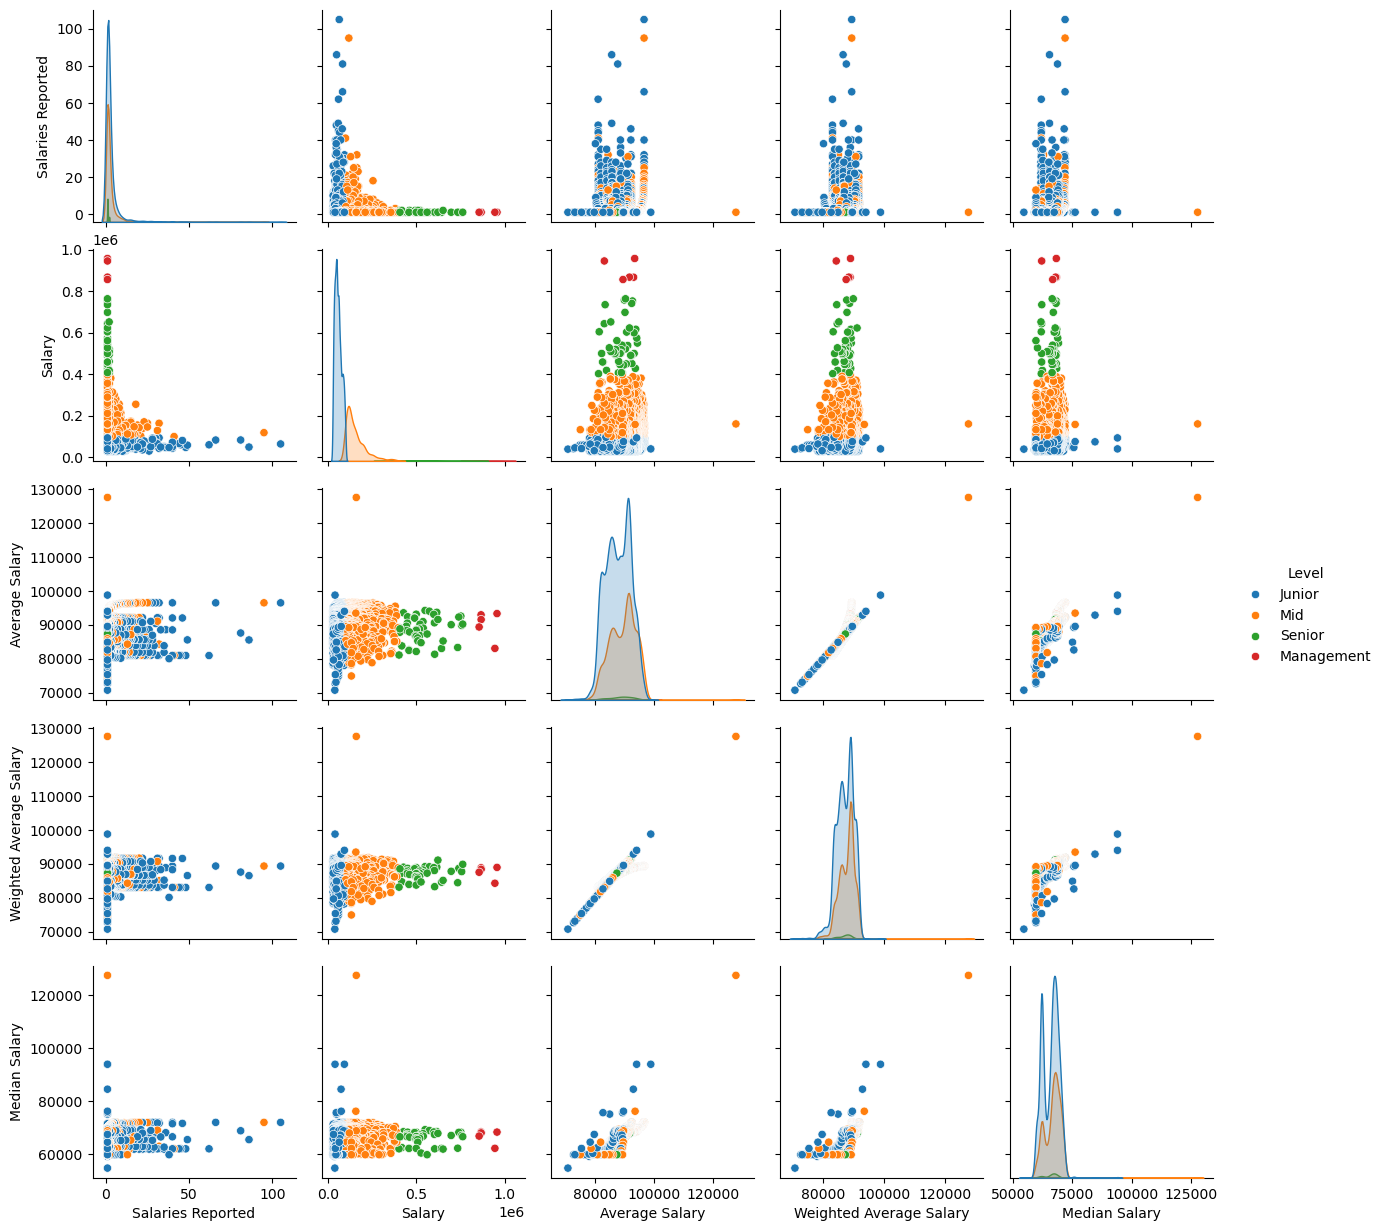

In [10]:
sns.pairplot(df,hue='Level')